In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.optimize as so

from scipy import odr
from uncertainties import unumpy, ufloat

First of all I import the data

In [2]:
data = open("ex6_data.txt").read().splitlines()

In [3]:
x=np.asarray(data, dtype="float")
x

array([2.28624099, 2.23737074, 2.35201118, ..., 2.22009142, 1.88685892,
       1.91752444])

I plot the data to see how it looks

(0.5, 726.6)

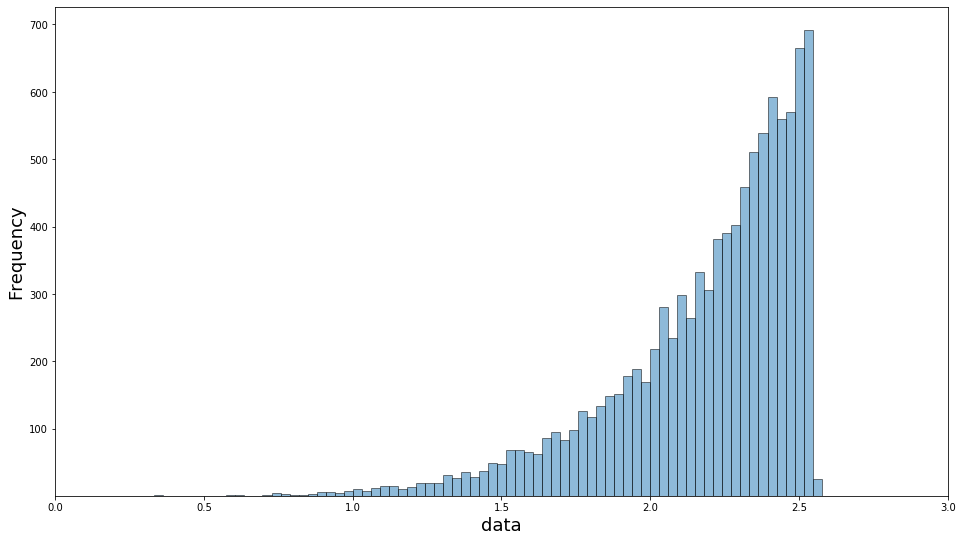

In [4]:
fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(16)

bins=np.linspace(0,3,100)
plt.hist(x, bins=bins,edgecolor='black', linewidth=1,alpha=0.5,label="data")
plt.xlabel("data", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xlim(0,3)
plt.ylim(0.50)

It looks like a power law

Therefore the model will be $$f(x)=A \cdot x^{\gamma}$$

The extended maximum likelihood is $$-\nu+\sum_{i=1}^{n} ln(\nu f(x_i,\theta))+C$$

When I put f(x) in the equation I get

$$-\nu+\Big[\sum_{i=1}^{n} ln(\nu)+ln(A)+\gamma\cdot ln(x) \Big]+C$$


Now I define the functions

In [7]:
def power_law(params,x):
    A, gamma = params
    return A*x**(gamma)

In [9]:
def Likelihood(params2,x):   #Extended-Maximum-Likelihood
    A,gamma,nu = params2
    
    LLH= -nu+np.sum(np.log(nu)+np.log(A)+np.log(x)*gamma)
    return LLH

I want to maximize the log-likelihood but since scipy only has a minimizer function, I can instead minimize the negative log-likelihood. Therefore I define the negative log-Likelihood.

In [11]:
def negative_Likelihood(params2,x):   #Extended-Maximum-Likelihood
    A,gamma,nu = params2
    
    LLH= +nu-np.sum(np.log(nu)+np.log(A)+np.log(x)*gamma)
    return LLH

In [45]:
Optimal= so.minimize(negative_Likelihood,x0=[1,1,1],args=(x))["x"]

In [46]:
Optimal  #This gives A,gamma,nu

array([5.49102229e+04, 3.16029054e+08, 3.90295846e+04])

Apparently the exponent is very large with $\gamma=3.16029054e+08$

In [27]:
power_law((Optimal[0],Optimal[1]),x)

C:\Users\mhage\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


array([inf, inf, inf, ..., inf, inf, inf])

This means that I can not apply the graphical method because the values are too large

This does not seem right.

I create an array with test values for gamma to apply the graphical method

In [17]:
gamma_test=np.arange(-4000,4000,1)
gamma_test

array([-4000, -3999, -3998, ...,  3997,  3998,  3999])

In [18]:
Likelihood_array=np.zeros(0)
for i in range(len(gamma_test)):
    Likelihood_a=Likelihood([Optimal[0],gamma_test[i], Optimal[2]],x)
    Likelihood_array=np.append([Likelihood_a],[Likelihood_array])
Likelihood_array

array([ 30930799.11348248,  30923108.44746654,  30915417.78145061, ...,
       -30571457.01593538, -30579147.68195131, -30586838.34796725])

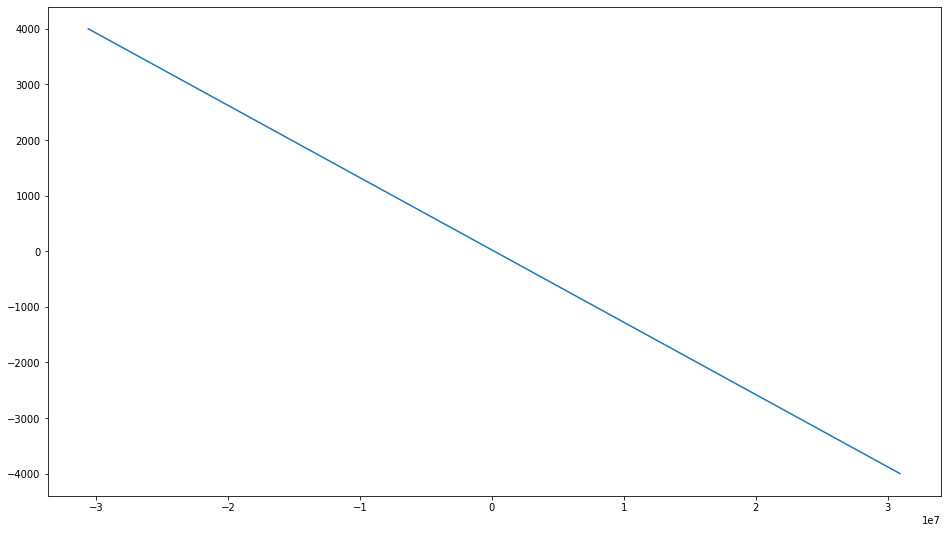

In [19]:
fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.plot(Likelihood_array,gamma_test)

There are no maxima for gamma in the range of -4000 to 4000

The equation from above 

$$ln(L)=-\nu+\Big[\sum_{i=1}^{n} ln(\nu)+ln(A)+\gamma\cdot ln(x) \Big]+C$$

Can further be rewritten

$$ln(L)=-\nu+n\cdot ln(\nu)+n\cdot ln(A)+\sum_{i=1}^{n}\gamma\cdot ln(x)+C$$

For a maximum the differential for each parameter has to be zero.

$$\frac{\partial ln(L)}{\partial{\nu}}=0=-1+\frac{n}{\nu}$$

We can see $\nu=n$

$$\frac{\partial ln(L)}{\partial{A}}=\frac{n}{A}=0$$

This means A to infinity 

$$\frac{\partial ln(L)}{\partial{\gamma}}=\sum_{i=1}^{n}ln(x)=0$$

but this sum can not be zero with the x values we have.

This suggest that $\nu$ is not a free parameter and has to be a function of A and $\gamma$

We can assume now $\nu(A,\gamma)$. This will change the three differentials above

The first one becomes

$$\frac{\partial ln(L)}{\partial{\nu}}=0=-1+\frac{n}{\nu}+\frac{n}{A}\cdot \frac{\partial A}{\partial\nu}+\frac{\partial \gamma}{\partial \nu}\sum_{i=1}^{n} ln(x)$$

The second becomes 
$$\frac{\partial ln(L)}{\partial{A}}=-\frac{\partial \nu}{\partial A}+n \cdot \frac{1}{\nu}\cdot \frac{\partial \nu}{\partial A}+\frac{n}{A}=0$$

The third becomes

$$\frac{\partial ln(L)}{\partial{\gamma}}=-\frac{\partial \nu}{\partial \gamma}+n \cdot \frac{1}{\nu}\cdot \frac{\partial \nu}{\partial \gamma}+\sum_{i=1}^{n}ln(x)=0$$

Now one needs to solve this system of diferential equations to find the relation between $\nu$ and A,$\gamma$

Maybe I am already on the wrong path to solve this exercise, so I stop here.